In [ ]:
import sys 
import numpy as np 
import time
import pandas as pd
import sklearn 
from sklearn import tree
from sklearn import svm 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix



import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=17)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

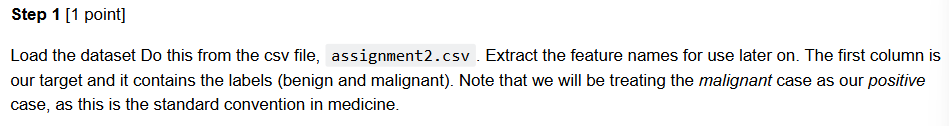

In [ ]:
data = pd.read_csv('assignment2.csv')

In [ ]:
#use df.columns to get feature names 
feature_names = data.columns
print(feature_names)

In [ ]:
#to preview the first few rows 
data.head

In [ ]:
#to retrieve columsn 
data.columns

In [ ]:
#summary of dataset
data.info()

#label is an object as it has categorical values 


In [ ]:
data.describe()
#summary of statistics of numerical columns

In [ ]:
data.isna().sum()
#check for missing values in the dataset

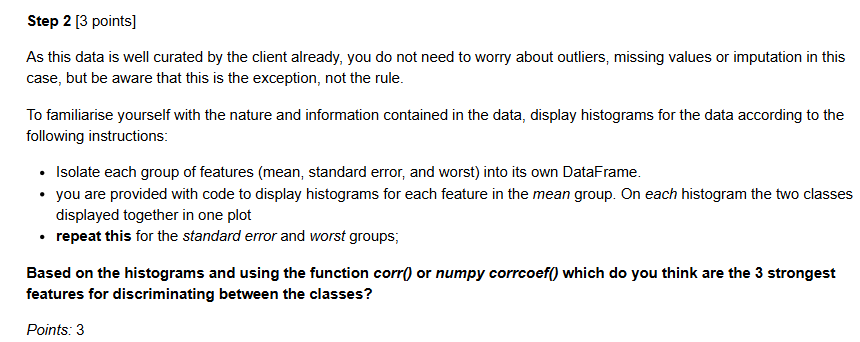

In [ ]:

# Separate the mean, standard error, and worst groups into separate dataframes
mean_group = data.filter(like ="mean")
error_group =data.filter(like="error") #standard error
worst_group = data.filter(like="_worst")

#  You can comment out the plotting code before uploading it to gradescope for faster evaluation
class_labels = ['benign', 'malignant'] 
fig = plt.figure(figsize=(12, 8))  

# Plot the histograms for each feature in the mean group with both classes displayed together
for i, feature in enumerate(mean_group.columns[:12]):  
    plt.subplot(3, 4, i+1)  
    plt.hist([mean_group[feature][data['label'] == 'benign'], 
              mean_group[feature][data['label'] == 'malignant']], 
              label=class_labels)  
    plt.xlabel("Feature Value")  
    plt.ylabel("Frequency")  
    plt.legend() 
    plt.title(feature)  
plt.tight_layout()  
plt.show()  

#standard error features
fig = plt.figure(figsize=(12,8))
for i, feature in enumerate(error_group.columns[:12]):  
    plt.subplot(3, 4, i+1)  
    plt.hist([error_group[feature][data['label'] == 'benign'], 
              error_group[feature][data['label'] == 'malignant']],
              label=class_labels)  
    plt.xlabel("Feature Value")  
    plt.ylabel("Frequency")  
    plt.legend() 
    plt.title(feature)  

plt.tight_layout()  
plt.show()

#worst group features
fig = plt.figure(figsize=(12, 8))
for i, feature in enumerate(worst_group.columns[:12]):
    plt.subplot(3, 4, i+1)
    plt.hist([worst_group[feature][data['label'] == 'benign'],
              worst_group[feature][data['label'] == 'malignant']],
             label=class_labels)
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.title(feature)
plt.tight_layout()
plt.show()

#convert the label to numeric : bengin = 0,malignant = 1
data['label_num'] = data['label'].map({'benign':0, 'malignant':1})

#combine all features into one dataframe excluding label column 
all_features = data.drop(columns=["label", "label_num"])

#calculate correlation of features with label to make sure label is numeric
correlations = all_features.corrwith(data['label_num']).abs()

#ranked features = ["feature1 name", "feature2 name", "feature3 name"]
ranked_features = correlations.sort_values(ascending=False).head(3).index.tolist()
# The following code is used by the autograder
step2_data = ranked_features

<!-- END QUESTION -->

**Step3** [3 points]

Convert the labels into 0s and 1s so that benign is represented by 0 and malignant is represented by 1.

Split the dataset into appropriate subsets for training, validation and test sets. You must choose the size of each subset. However, make sure that the proportion of the two classes is consistent across all datasets using the _stratify_ option, as used in workshops 5 and 6. Verify the size and label distribution in each dataset.

_Points:_ 3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Convert labels benign/malignant to 0/1 using LabelBinarizer
lb = preprocessing.LabelBinarizer()
data['label_num'] = lb.fit_transform(data['label']).ravel()

# Extract features and labels
X = data.drop(columns=['label', 'label_num']).values
y = data['label_num']

X_bigtrain, X_test, y_bigtrain, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Second split: from 80%, get 60% train, 20% val
X_train, X_val, y_train, y_val = train_test_split(
    X_bigtrain, y_bigtrain, test_size=0.25, stratify=y_bigtrain, random_state=42)

# Print the size of each resulting subset
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

# The following code is used by the autograder
step3_data = [len(X_train), len(X_val) , len(X_test)]

**Step4** [4 points]

Baseline measurements 

For our classification task we will consider **three simple baseline cases**:
1) predicting all samples to be negative (class 1)
2) predicting all samples to be positive (class 2)
3) making a random prediction for each sample with equal probability for each class 

_Points:_ 4

In [ ]:
baseline1_preds = np.zeros(len(y_test), dtype=int)
baseline2_preds = np.ones(len(y_test), dtype = int)
np.random.seed(42)
baseline3_preds= np.random.choice([0,1], size=len(y_test))
# The following codeis used by the autograder.
step4_data = [baseline1_preds, baseline2_preds, baseline3_preds] 

**Step5** [2 points]

Write a function that returns the following metrics for all baseline measures created in Step4, use the function and print the metrics:

 - recall
 - precision
 - auc
 - f1score

_Points:_ 2

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score

In [ ]:
def calculate_metrics(y_true, y_prob):
    y_true = np.array(y_true)
    y_prob = np.array(y_prob)
    y_pred = (y_prob >= 0.5).astype(int)
    
    recall =recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    f1 = f1_score(y_true, y_pred)
    
    return recall, precision, auc, f1

baseline1_metrics = np.zeros(len(y_test))
baseline2_metrics = np.ones(len(y_test))
baseline3_metrics = np.random.rand(len(y_test))


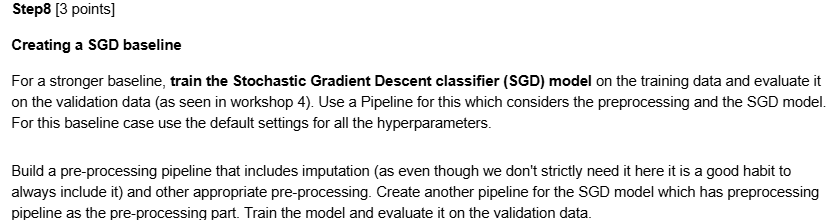

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


preproc_pl = Pipeline([('imputer', SimpleImputer(strategy='mean'), ('scaler', StandardScaler()))])

sgd_base = Pipeline([('preprocessing', preproc_pl), ('classifier', SGDClassifier(loss='log_loss', random_state=42))])

In [ ]:
# fit the SGD pipeline on the training data
sgd_base.fit(X_train, y_train)
# evaluate on the validation data
y_val_scores = sgd_base.decision_function(X_val)
y_val_probs = 1 / (1 + np.exp(-y_val_scores)) #convert decision function to probability

print("Validation Recall (SGD baseline):", calculate_metrics(y_val, y_val_probs)[0])
# The following code is used by the autograder.
step8_data = sgd_base

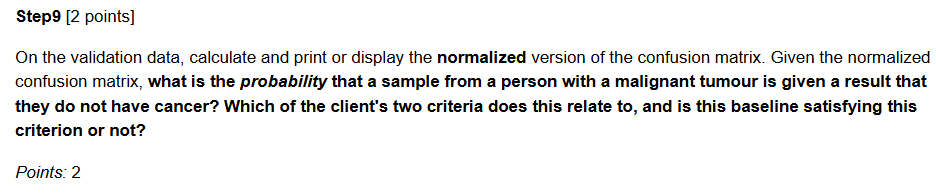

In [ ]:
from sklearn.metrics import confusion_matrix

cmat = confusion_matrix(y_true=y_val, y_pred=y_val_pred, normalize='true')
sn.heatmap(cmat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalised Confusion Matrix')
plt.show()
#87% bengin samples correctly predicted = TRUE NEGATIVE 
#13% bengin samples predicted as malignant = FALSE POSITIVES
#5.6% malignant samples incorrectly predicted as bengin = FALSE NEGATIVES
#94% malignant samples predicted as malignant = TRUE POSITIVE

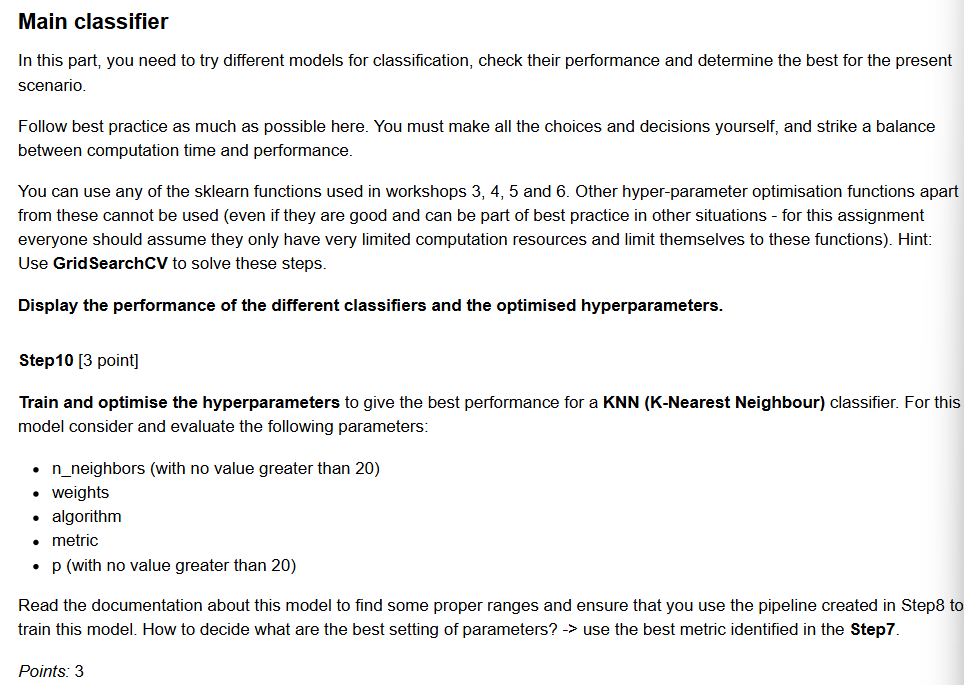

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_pl = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])


#define the parameter grid 
parameters ={
    'knn__n_neighbors': [3, 5, 10, 20],
    'knn__weights' : ['uniform', 'distance'],
    'knn__algorithm':['auto','ball_tree', 'kd_tree','brute'],
    'knn__metric':['minkowski'],
    'knn__p':[1,2,3,5,10]
} 
#grid search with 5 fold cv 
knn = model = GridSearchCV(knn_pl, parameters, cv=5, scoring='f1', n_jobs=-1)
knn_model.fit(x_train, y_train)


knn_best_parameters = knn_model.best_params_

print(f'knn_best_parameters : {knn_model.best_params_}') 

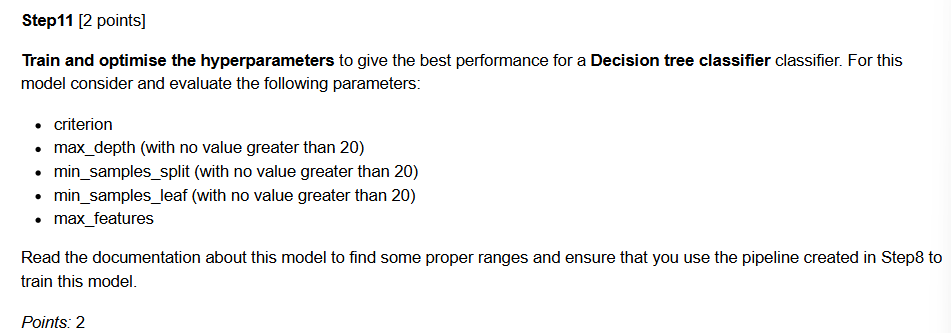

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_pl = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()), 
    ('dt', DecisionTreetClassifier(random_state=42))
])

dt_parameters={
    'criterion':['gini','entropy']
    'max_depth':[3,5,10,15,20],
    'min_samples_split':[2,5,10,15],
    'min_samples_leaf':[1,2,5,10],
    'max_features':[None, 'sqrt', 'log2']
}

dt_model = GridSearchCV(dt_pl, dt_parameters, cv=5, scoring='f1', n_jobs=-1)
dt_model.fit(x_train, y_train)

dt_best_parameters=dt_model.best_params_
print(f"Best Decision Tree Accuracy:{dt_model.best_score_:4f}")
print(f"Best Parameters:{dt_best_parameters}")



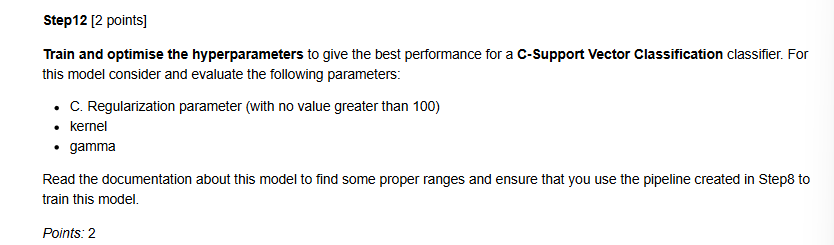

In [ ]:
from sklearn.svm import SVC

svc_pl = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('svc', SVC(probability = True, random_state=42))
])

svc_parameters={
    'svc__C':[0.1,1,10,50,100], #regularization
    'svc__kernel':['linear', 'rbf','poly'],#kernel type
    'svc__gamma':['scale','auto',0.01,0.001] #kernel coefficient
}
#gridsearchcv with cv=5
svc_model = GridSearchCV(svc_pl, svc_parameters, cv=5, scoring='f1', n_jobs=-1)
svc_model.fit(x_train, y_train)
#return the best parameters in a dictionary 
svc_best_parameters = svc_model.best_params_
print(f"Best Parameters: {svc_best_parameters}")

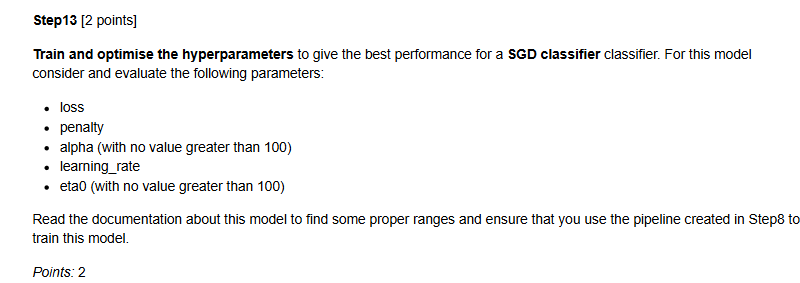

In [ ]:
from sklearn.linear_model import SGDClassifier
# Put the pipeline with the appropriate model 
sgd_pl = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier(random_state=42))
])
    
sgd_parameters = {
        'sgd__loss': ['hinge', 'log_loss'],
        'sgd__penalty': ['l2', 'l1', 'elasticnet'],
        'sgd__alpha': [0.0001, 0.001, 0.01,0.1,1], #must be less than 100
        'sgd__learning_rate': ['constant', 'optimal', 'adaptive','invscaling'],
        'sgd__eta0':[0.001,0.01, 0.1,1,10] #when learning rate is constant but avoids crashing and must be less than 100
    }

# Use GridSearchCV with cv=5
sgd_model =  GridSearchCV(sgd_pl, sgd_parameters, cv=5, scoring='f1', n_jobs=-1)
sgd_model.fit(X_train, y_train)

# Return best parameters in a dictionary
sgd_best_parameters = sgd_model.best_params_
print(f"Best Parameters: {sgd_best_parameters}")

# The following code is used by the autograder.

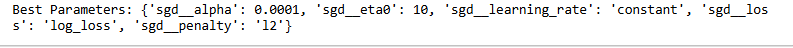

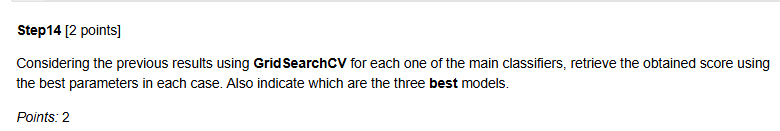

In [ ]:
# Assign the best score for each model 
knn_best_cv_scoring = knn_model.best_score_
dt_best_cv_scoring  = dt_model.best_score_
svc_best_cv_scoring = svc_model.best_score_
sgd_best_cv_scoring = sgd_model.best_score_

'''
What are the three best models so far? Assign a list of the three best models
to the variable below (best to worst). The model options are "knn", "dt", "svc" or "sgd"
'''
model_scores = {
    "knn": knn_best_cv_scoring,
    "dt": dt_best_cv_scoring,
    "svc": svc_best_cv_scoring,
    "sgd": sgd_best_cv_scoring
}
#only return the top 3 models 
best_models = sorted(model_scores, key=model_scores.get, reverse=True)[:3]  # top 3 only


print("Top 3 models by cross-validation F1 score:", best_models)
print("Scores:", model_scores)
# The following code is used by the autograder.
step14_data = best_models,knn_best_cv_scoring,dt_best_cv_scoring,svc_best_cv_scoring,sgd_best_cv_scoring

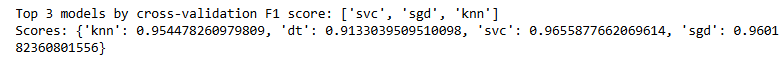

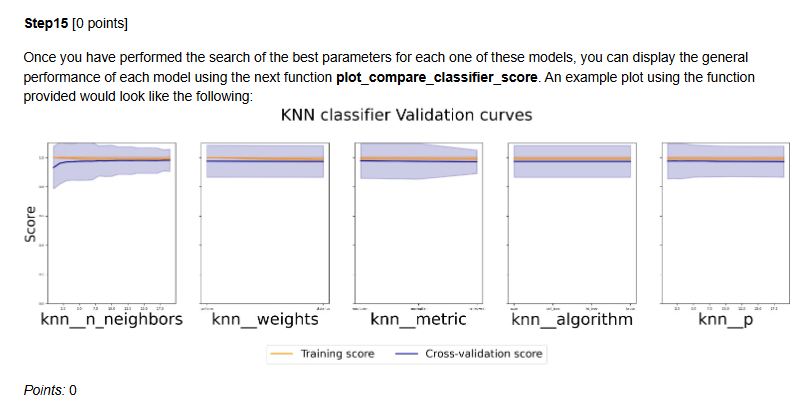

In [ ]:
# Function to check the performance of each parameter.
def pooled_var(stds):
    # https://en.wikipedia.org/wiki/Pooled_variance#Pooled_standard_deviation
    n = 5 # size of each group
    return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))

# Function to create loss curves
def plot_gridSearchCV_loss_curve(cv_results,grid_params,title):

    df = pd.DataFrame(cv_results)
    results = ['mean_test_score',
               'mean_train_score',
               'std_test_score',
               'std_train_score']


    fig, axes = plt.subplots(1, len(grid_params),
                             figsize = (5*len(grid_params), 7),
                             sharey='row')
    axes[0].set_ylabel("Score", fontsize=25)


    for idx, (param_name, param_range) in enumerate(grid_params.items()):
        grouped_df = df.groupby(f'param_{param_name}')[results]\
            .agg({'mean_train_score': 'mean',
                  'mean_test_score': 'mean',
                  'std_train_score': pooled_var,
                  'std_test_score': pooled_var})

        previous_group = df.groupby(f'param_{param_name}')[results]
        axes[idx].set_xlabel(param_name, fontsize=30)
        axes[idx].set_ylim(0.0, 1.1)
        lw = 2
        axes[idx].plot(param_range, grouped_df['mean_train_score'], label="Training score",
                    color="darkorange", lw=lw)
        axes[idx].fill_between(param_range,grouped_df['mean_train_score'] - grouped_df['std_train_score'],
                        grouped_df['mean_train_score'] + grouped_df['std_train_score'], alpha=0.2,
                        color="darkorange", lw=lw)
        axes[idx].plot(param_range, grouped_df['mean_test_score'], label="Cross-validation score",
                    color="navy", lw=lw)
        axes[idx].fill_between(param_range, grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                        grouped_df['mean_test_score'] + grouped_df['std_test_score'], alpha=0.2,
                        color="navy", lw=lw)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.suptitle(f'{title} Validation curves', fontsize=30)
    fig.legend(handles, labels, loc=8, ncol=2, fontsize=20)

    fig.subplots_adjust(bottom=0.25, top=0.85)
    plt.show()
    
# Check the performance for each model (knn, dt, svc and sgd). Use plot_gridSearchCV_loss_curve() function.






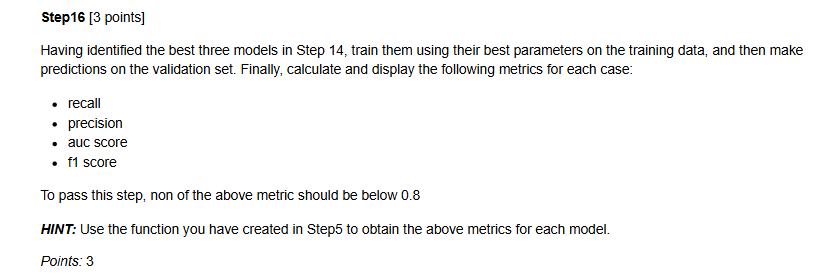

In [ ]:

'''
Assign the predictions made by each model to the variables below.
'''
#model name strings from step 14
model_map = {
    "knn": knn_model.best_estimator_,
    "dt" : dt_model.best_estimator_,
    "svc":svc_model.best_estimator_,
    "sgd" : sgd_model.best_estimator_,
}
#pick top 3 models
predictions_model1 = model_map[best_models[0]].predict_proba(X_val)[:, 1]
predictions_model2 = model_map[best_models[1]].predict_proba(X_val)[:, 1]
predictions_model3 = model_map[best_models[2]].predict_proba(X_val)[:, 1]

'''
HINT: Use the function you have created in Step5. The function returns a tuple
containing the metrics recall ,  precision , auc score f1 score.
'''
metrics_model1 = calculate_metrics(y_val, predictions_model1)
metrics_model2 = calculate_metrics(y_val, predictions_model2)
metrics_model3 = calculate_metrics(y_val, predictions_model3)

#display the metrics for each model 
print("Model 1 (", best_models[0], "):", metrics_model1)
print("Model 2 (", best_models[1], "):", metrics_model2)
print("Model 3 (", best_models[2], "):", metrics_model3)
# The following code is used by the autograder.
step16_data = [(predictions_model1, predictions_model2, predictions_model3),(metrics_model1, metrics_model2, metrics_model3)]

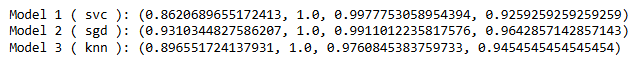

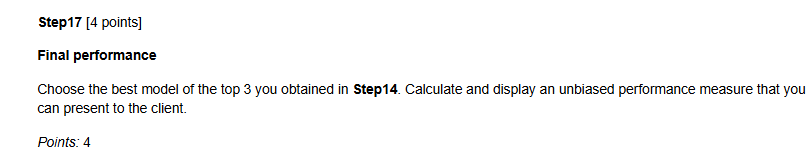

In [ ]:
'''
Assign the training features, training labels that you would use for this step to the variables
below.
'''
X_train_final = np.vstack((X_train, X_val))
y_train_final = np.concatenate((y_train, y_val))

# Assign the best model to the variable below and train it
final_model = knn_model.best_estimator_
final_model.fit(X_train_final, y_train_final)


# Assign the predictions made from your chosen best model for the unbiased estimate to the variable below.
predictions_final_model = final_model.predict_proba(X_test)[:,1]

# Choose a performance metric based on the client's requirement and assign the result to the variable below.
metrics = calculate_metrics(y_test, predictions_final_model)
chosen_performance_metric_result = metrics[3] 

# Print the metrics
print("Recall:", metrics[0])
print("Precision:", metrics[1])
print("AUC:", metrics[2])
print("F1 Score:", metrics[3])

# The following code is used by the autograder
step17_data = (predictions_final_model, chosen_performance_metric_result,
               X_train_final, y_train_final,final_model)

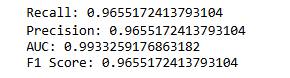

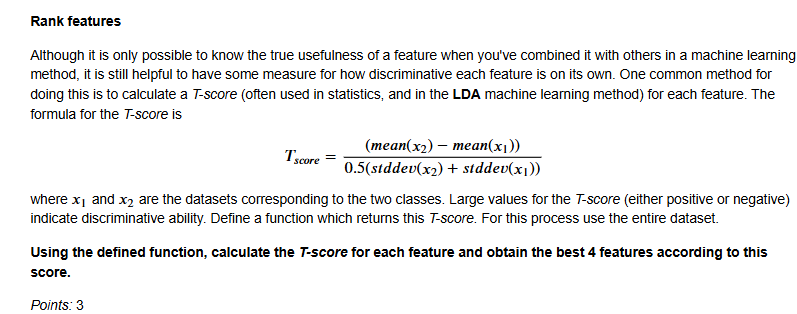

In [ ]:
# Implement this function to calculate T score
def calculate_t_score(x1, x2):
    mean1 = np.mean(x1)
    mean2 = np.mean(x2)
    std1 = np.std(x1, ddof=1)
    std2 = np.std(x2, ddof=1)
    
    denominator = 0.5*(std1+std2)
    if denominator == 0:
        return 0
    return (mean2- mean1)/denominator
#split the training data into two datasets corresponding to the two classes
#assuming X_train is your training features and y_train is your training labels

# Use full training set — update to X_train_final or other if needed
# Split data by class
class_0 = data[data['label_num'] == 0]
class_1 = data[data['label_num'] == 1]

feature_names= data.drop(columns=['label', 'label_num']).columns
#calculate the t score for the feature
t_scores = {}
for feature in feature_names:
    score = calculate_t_score(class_0[feature], class_1[feature])
    t_scores[feature] = abs(score)
    

# Top 4 feature indices
best_four_features = sorted(t_scores, key=t_scores.get, reverse=True)[:4]

print("Top 4 features ranked by T-score:", best_four_features)

# The following code is used by the autograder.
step18_data = best_four_features.copy()

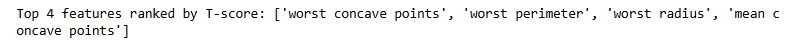

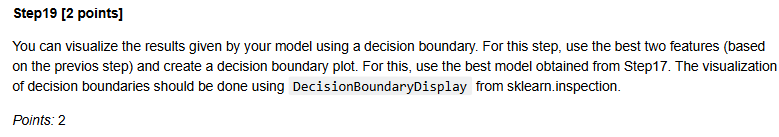

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay


# Use the top 2 features from Step 18
feature_one = best_four_features[0]
feature_two = best_four_features[1]

# Create 2D dataset
data2d = data[[feature_one, feature_two]]
labels2d = data["label_num"]

X_train_2d, _, y_train_2d, _ = train_test_split(data2d, labels2d, test_size=0.2, stratify=labels2d, random_state=42)

# === This is the correct Step 19 trick ===
# Recreate your Step 17 model (e.g., SGDClassifier) on 2 features
retrained_model_2d = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("classifier", SGDClassifier(loss="log_loss", random_state=42))
])
retrained_model_2d.fit(X_train_2d, y_train_2d)

X_train = pd.DataFrame(X_train, columns=data.drop(columns=["label", "label_num"]).columns)

# Plot decision boundary
disp_step19 = DecisionBoundaryDisplay.from_estimator(
    retrained_model_2d,         # must be the retrained copy, not final_model
    X_train_2d,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8
)

# DO NOT TOUCH THIS SECTION — required by the assignment
disp_step19.ax_.scatter(X_train[feature_one], X_train[feature_two],
                        c=y_train, edgecolor="k",
                        cmap=plt.cm.coolwarm)
plt.xlim(-0.3, 0.3)
plt.title(f"Decision surface for tree trained on {feature_one} and {feature_two}")
plt.show()

# For autograder
step19_data = feature_one, feature_two, data2d


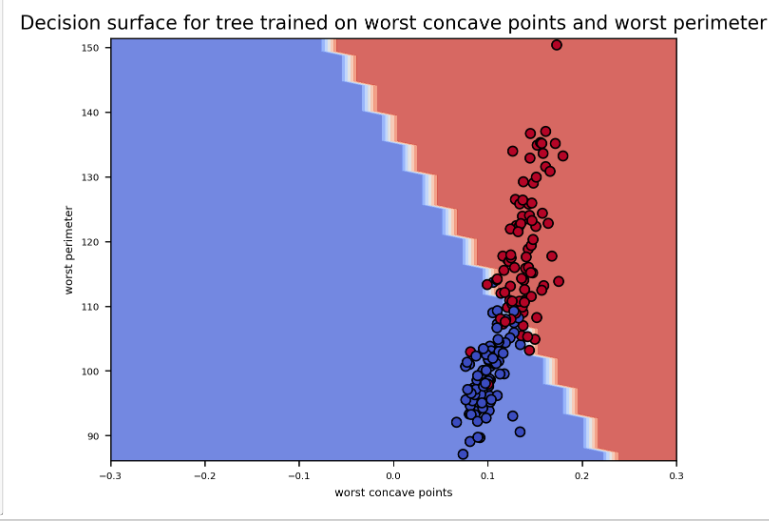